In [1]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
def set_font():
    font = {'weight' : 'normal',
            'size'   : 14}
    matplotlib.rc('font', **font)

# 1. Exploratory Data Analysis
### Dataset description

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print iris['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Dataset summary

In [5]:
iris_df = DataFrame(iris['data'], columns=iris['feature_names'])

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df['species'] = iris['target']
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


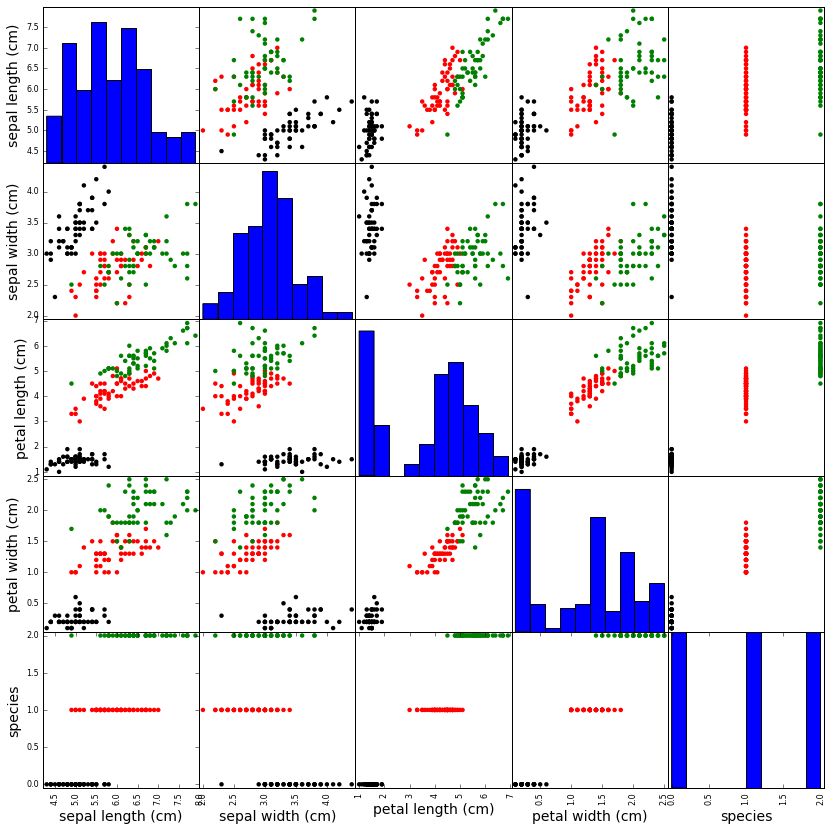

In [8]:
from pandas.tools.plotting import scatter_matrix
colors=['black','red','green']
scatter_matrix(iris_df, alpha=1, figsize=(14, 14), marker='o',edgecolors='none',
               c=iris_df.species.apply(lambda x:colors[x]));
# adjust font size
font = {'weight' : 'normal',
            'size'   : 14}
matplotlib.rc('font', **font)

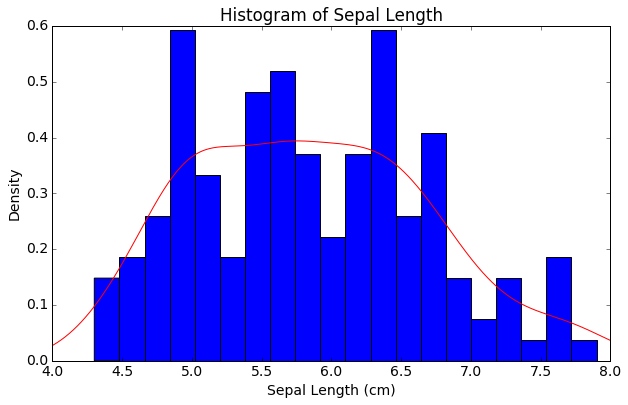

In [9]:
iris_df['sepal length (cm)'].plot.hist(bins=20, figsize=(10,6), normed=1, color='b')
plt.title('Histogram of Sepal Length')
set_font()
plt.xlim(4,8);
plt.xlabel('Sepal Length (cm)')
iris_df['sepal length (cm)'].plot.kde(color='r');

### Map species with category names

In [10]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [11]:
iris_df['category'] = np.nan
for i in range(3):
    iris_df.loc[iris_df['species'] == i, 'category'] = iris.target_names[i]

In [12]:
iris_df.iloc[[0,50,120]] #print row 0, 50 and 120

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category
0,5.1,3.5,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
120,6.9,3.2,5.7,2.3,2,virginica


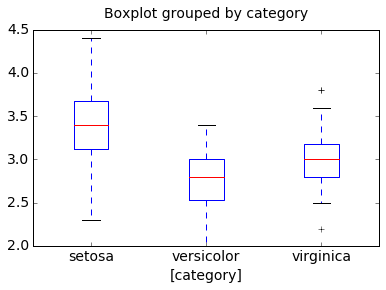

In [13]:
box=iris_df[['sepal width (cm)','category']].boxplot(by='category');
plt.title('');
plt.grid('off')

# 2. Data Visualization

```ggplot``` is a plotting system for Python based on R's ```ggplot2```

In [14]:
from ggplot import *

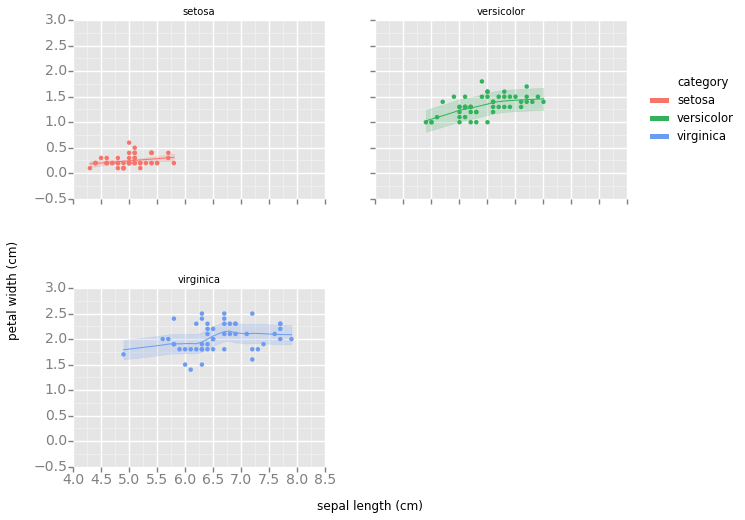

<ggplot: (299977853)>

In [28]:
ggplot(aes(x='sepal length (cm)', y='petal width (cm)', color='category'), data=iris_df) +\
facet_wrap('category') + geom_point() + stat_smooth() +\
geom_point(size=5)

# 3. Data Manipulation

In [16]:
tmp = iris_df[(iris_df['category'] == 'versicolor') & (iris_df['sepal length (cm)'] > 6.6)].copy()
tmp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category
50,7.0,3.2,4.7,1.4,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
65,6.7,3.1,4.4,1.4,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
77,6.7,3.0,5.0,1.7,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor


tmp is a copy of the original dataframe. Therefore any changes made to tmp won't be reflected on iris_df

In [17]:
tmp.sort_values(by=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], 
                ascending=[True, True, False])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category
77,6.7,3.0,5.0,1.7,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor
65,6.7,3.1,4.4,1.4,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
50,7.0,3.2,4.7,1.4,1,versicolor


In [18]:
tmp2 = iris_df.copy()
tmp2['sepal size (cm^2)'] = iris_df['sepal length (cm)'].multiply(iris_df['sepal width (cm)'])
tmp2['petal size (cm^2)'] = iris_df['petal length (cm)'].multiply(iris_df['petal width (cm)'])

In [19]:
tmp2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category,sepal size (cm^2),petal size (cm^2)
0,5.1,3.5,1.4,0.2,0,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,0,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,0,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,0,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,0,setosa,18.00,0.28


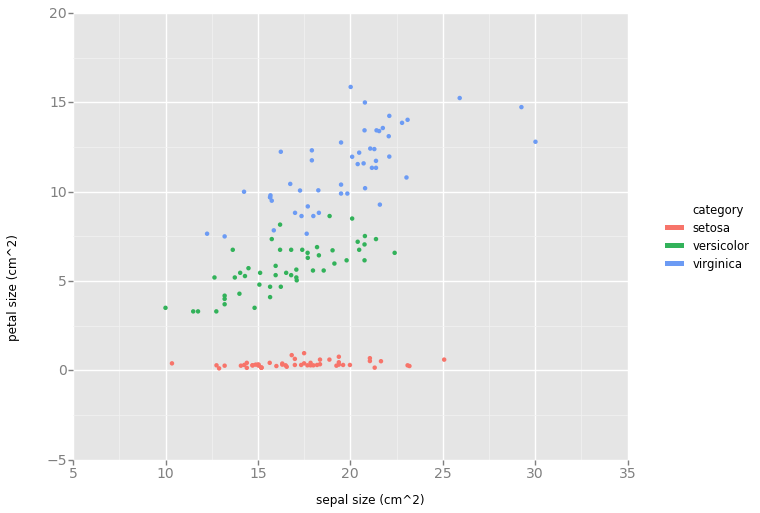

<ggplot: (296237701)>

In [20]:
ggplot(tmp2, aes(x='sepal size (cm^2)', y='petal size (cm^2)', color='category')) +\
geom_point(size=20)

In [21]:
tmp2[['sepal size (cm^2)', 'petal size (cm^2)', 'category']].groupby(by='category').mean()

,sepal size (cm^2),petal size (cm^2)
category,,
setosa,17.2088,0.3628
versicolor,16.5262,5.7204
virginica,19.6846,11.2962


In [22]:
tmp3 = DataFrame({'category':iris.target_names, 'x1': ['A','B','C'], 'x2':np.random.rand(3).round(3)})

In [23]:
tmp3

,category,x1,x2
0,setosa,A,0.869
1,versicolor,B,0.802
2,virginica,C,0.652


In [24]:
iris_df.merge(tmp3,on='category').head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category,x1,x2
0,5.1,3.5,1.4,0.2,0,setosa,A,0.869
1,4.9,3.0,1.4,0.2,0,setosa,A,0.869
2,4.7,3.2,1.3,0.2,0,setosa,A,0.869
3,4.6,3.1,1.5,0.2,0,setosa,A,0.869
4,5.0,3.6,1.4,0.2,0,setosa,A,0.869


# 4. Lastly

In [25]:
tmp2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,category,sepal size (cm^2),petal size (cm^2)
0,5.1,3.5,1.4,0.2,0,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,0,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,0,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,0,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,0,setosa,18.00,0.28


In [26]:
tmp2 = tmp2[tmp2['category']!='virginica']

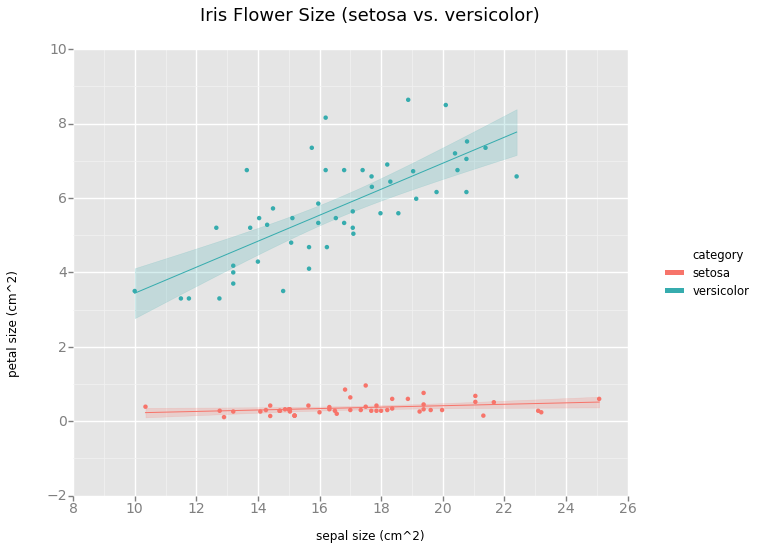

<ggplot: (299418105)>

In [27]:
ggplot(tmp2, aes(x='sepal size (cm^2)', y='petal size (cm^2)', color='category')) + geom_point() +\
stat_smooth(method='lm') + ggtitle(element_text(text='Iris Flower Size (setosa vs. versicolor)', size=18))